![banner.jpg](./images/banner.jpg)

# <center>**MACHINE LEARNING : Etude du dataset manchots de l'antarctique**</center>

# **INTRODUCTION**

Le dataset que nous avons choisis est sur les différentes espèces de machots présentes sur l'archipel Palmer. C'est un ensemble d'îles au large de la côte nord-ouest de la péninsule Antarctique.

<div style="text-align:center"><img src="./images/anvers.png" /></div>

Notre objectif est donc dans une première partie de récupérer les données et d'y faire un preprocessing. Puis dans une deuxième partie de préparer ces données pour qu'elles soient utilisés dans des algorithmes de machine learning. Pour finalement améliorer les algorithmes utilisés (tuning) et de les comparer.

Source du dataset : https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data

# **IMPORTATIONS (MODULES/DATASET)**

+ **Pandas et Numpy :** manipulation et analyse des données                                                          

+ **Seaborn et pyplot :** visualisation des données
                                            
+ **Sklearn :** apprentissage automatique

+ **OS :** interface système d'exploitation

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import os

**os.getcwd** permet d'avoir le chemin jusqu'au dossier du notebook et donc de manipuler plus facilement les différents fichier

In [116]:
cwd = os.getcwd()

Importation du dataset nommé **penguins_lter.csv** avec comme colonne d'index la colonne **Sample Number** du dataset correpondant à l'échantillon relevé

In [117]:
df = pd.read_csv(cwd+'/penguins_lter.csv',index_col='Sample Number')

# **FONCTIONS**

Fonction permettant de compter le pourcentage de NaN dans le dataset

In [118]:
def count_na_percent(df, threshold) : 
    mask = df.isna().sum() > threshold
    missing_values_count = df.isna().sum()
    return (missing_values_count[mask] / len(df) *100).sort_values(ascending=False)

Fonction qui ajoute les valeurs directement sur les graphiques barres horizontaux de seaborn

In [119]:
def show_values(axs,space=.01):
    def _single(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
            value = '{:.5f}'.format(p.get_width())
            ax.text(_x, _y, value, ha="left")
    _single(axs)

# **COUP D'OEIL ET PRÉSENTATION DES DONNÉES**

Description pour avoir le type des données

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 1 to 124
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Species              344 non-null    object 
 2   Region               344 non-null    object 
 3   Island               344 non-null    object 
 4   Stage                344 non-null    object 
 5   Individual ID        344 non-null    object 
 6   Clutch Completion    344 non-null    object 
 7   Date Egg             344 non-null    object 
 8   Culmen Length (mm)   342 non-null    float64
 9   Culmen Depth (mm)    342 non-null    float64
 10  Flipper Length (mm)  342 non-null    float64
 11  Body Mass (g)        342 non-null    float64
 12  Sex                  334 non-null    object 
 13  Delta 15 N (o/oo)    330 non-null    float64
 14  Delta 13 C (o/oo)    331 non-null    float64
 15  Comments             26 non-null     obj

Voir a quoi ressemble le dataset

In [121]:
df.head()

,studyName,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
Sample Number,,,,,,,,,,,,,,,,
1,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
2,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
3,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
4,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
5,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


**Information sur les données présentes dans le dataset :**

|        **Champ**        | **Description**                                                                                                    |
|:-----------------------:|--------------------------------------------------------------------------------------------------------------------|
|        **Sample**       | *Un nombre entier indiquant la séquence de numérotation continue pour chaque échantillon*                          |
|      **studyName**      | *Expédition d'échantillonnage à partir de laquelle les données ont été collectées, générées, etc.*                 |
|       **Species**       | *Une chaîne de caractères désignant l'espèce du manchot*                                                           |
|        **Region**       | *Une chaîne de caractères indiquant la région de la grille d'échantillonnage Palmer LTER*                          |
|        **Island**       | *Une chaîne de caractères désignant l'île près de la station Palmer où les échantillons ont été prélevés*          |
|        **Stage**        | *Une chaîne de caractères indiquant le stade de reproduction au moment de l'échantillonnage*                       |
|    **Individual ID**    | *Une chaîne de caractères indiquant l'identifiant unique de chaque individu dans l'ensemble de données*            |
|  **Clutch Completion**  | *Une chaîne de caractères indiquant si le nid d'étude observé avec une couvée complète, c'est-à-dire 2 œufs*       |
|       **Date Egg**      | *Une date indiquant la date à laquelle le nid de l'étude a été observé avec 1 œuf (échantillonné)*                 |
|  **Culmen Length (mm)** | *Un nombre indiquant la longueur de la crête dorsale du bec du manchot (millimètres)*                              |
|  **Culmen Depth (mm)**  | *Un nombre indiquant la profondeur de la crête dorsale du bec du manchot (millimètres)*                            |
| **Flipper Length (mm)** | *Un entier indiquant la longueur de la nageoire du manchot (millimètres)*                                          |
|    **Body Mass (g)**    | *Un nombre entier indiquant la masse corporelle du manchot (grammes)*                                              |
|         **Sex**         | *Une chaîne de caractères indiquant le sexe du manchot*                                                            |
|  **Delta 15 N (o/oo)**  | *Un nombre indiquant la mesure du rapport des isotopes stables 15N:14N*                                            |
|  **Delta 13 C (o/oo)**  | *Un nombre indiquant la mesure du rapport des isotopes stables 13C:12C*                                            |
|       **Comments**      | *Une chaîne de caractères avec du texte fournissant des informations supplémentaires pertinentes pour les données* |

![penguin.png](./images/penguin.png)

 


# **AJOUT DE FEATURES**

**Ici nous ajoutons 4 features afin d'ameliorer en amont les résultats de nos algorithmes de machine learning**

|         **Champ**         | **Description**                                                                                                                 |
|:-------------------------:|---------------------------------------------------------------------------------------------------------------------------------|
| **Culment Surface (mm2)** | *Un nombre indiquant la surface de la crête dorsale du bec du manchot (en millimètre carré)*                                    |
|   **Total Lenght (mm)**   | *Un nombre indiquant longueur plus la profondeur de la crête dorsale plus la longueur de la nageoire du manchot (en millimètre)* |
|    **Delta Tot (o/oo)**   | *Un nombre indiquant la somme rapport des isotopes stables 15N:14N et rapport des isotopes stables 13C:12C*                     |
| **Massic Volume (g/mm3)** | *Un nombre indiquant la masse volumique d'un manchot (en gramme par millimètre cube)*                                           |

In [122]:
df["Culmen Surface (mm2)"] = df["Culmen Length (mm)"] * df["Culmen Depth (mm)"]
df["Total Lenght (mm)"] = df["Culmen Length (mm)"] + df["Culmen Depth (mm)"] + df["Flipper Length (mm)"]
df["Delta Tot (o/oo)"] = df["Delta 15 N (o/oo)"] + df["Delta 13 C (o/oo)"]
df["Massic Volume (g/mm3)"] = df["Body Mass (g)"] / (df["Culmen Length (mm)"] * df["Culmen Depth (mm)"] * df["Flipper Length (mm)"])

Vérification de l'ajout des quatres features

In [123]:
df.head()

,studyName,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,Culmen Surface (mm2),Total Lenght (mm),Delta Tot (o/oo),Massic Volume (g/mm3)
Sample Number,,,,,,,,,,,,,,,,,,,,
1,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.,731.17,238.8,NaN,0.028336
2,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN,687.30,242.9,-15.74498,0.029725
3,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN,725.40,253.3,-16.96481,0.022976
4,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.,NaN,NaN,NaN,NaN
5,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN,708.31,249.0,-16.55775,0.025237


# **DATA CLEANNING**

Dans cette partie nous allons réalisé le data cleaning, c'est à dire supprimer les colonnes inutiles et modifier les valeurs d'autres

In [92]:
df = df.drop(["Comments","Stage","Individual ID","Date Egg","studyName","Region"], axis=1)

On normalise dans l'ordre, les colonnes : Island, Species, Clutch Completion et Sex

In [93]:
df = df.replace(['Torgersen', 'Biscoe', 'Dream'],[0,1,2])

df = df.replace(['Adelie Penguin (Pygoscelis adeliae)','Chinstrap penguin (Pygoscelis antarctica)','Gentoo penguin (Pygoscelis papua)'],[0,1,2])

df = df.replace(['Yes', 'No'],[1,0])

df["Sex"] = df["Sex"].replace(np.nan, 'None Specified')
df["Sex"] = df["Sex"].replace('.', 'None Specified')
df = df.replace(['MALE', 'FEMALE', 'None Specified'],[0,1,2])

On vérifie que les changement sur les colonnes ont bien été pris en compte

In [94]:
df

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Culmen Surface (mm2),Total Lenght (mm),Delta Tot (o/oo),Massic Volume (g/mm3)
Sample Number,,,,,,,,,,,,,,
1,0,0,1,39.1,18.7,181.0,3750.0,0,NaN,NaN,731.17,238.8,NaN,0.028336
2,0,0,1,39.5,17.4,186.0,3800.0,1,8.94956,-24.69454,687.30,242.9,-15.74498,0.029725
3,0,0,1,40.3,18.0,195.0,3250.0,1,8.36821,-25.33302,725.40,253.3,-16.96481,0.022976
4,0,0,1,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
5,0,0,1,36.7,19.3,193.0,3450.0,1,8.76651,-25.32426,708.31,249.0,-16.55775,0.025237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2,1,0,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
121,2,1,1,46.8,14.3,215.0,4850.0,1,8.41151,-26.13832,669.24,276.1,-17.72681,0.033707
122,2,1,1,50.4,15.7,222.0,5750.0,0,8.30166,-26.04117,791.28,288.1,-17.73951,0.032733


# **TRAITEMENT DES NaN**

On récupère les dimensions de notre dataframe pour l'analyse

In [96]:
nrows = df.shape[0]
ncols = df.shape[1]
ncols,nrows

(14, 344)

Pour connaitre le pourcentage de NaN selon le nombre de cellules du DataFrame on execute le code ci dessous (on obtient 1,15%)

In [97]:
nb_cells = np.product(df.shape)
nb_na = df.isna().sum().sum()
nb_na / nb_cells * 100

1.1420265780730898

In [98]:
count_na_percent(df, 0)

Delta Tot (o/oo)         4.069767
Delta 15 N (o/oo)        4.069767
Delta 13 C (o/oo)        3.779070
Massic Volume (g/mm3)    0.581395
Total Lenght (mm)        0.581395
Culmen Surface (mm2)     0.581395
Body Mass (g)            0.581395
Flipper Length (mm)      0.581395
Culmen Depth (mm)        0.581395
Culmen Length (mm)       0.581395
dtype: float64

On décide finalement de drop les NaN restant (on enlève 14 lignes sur 344 donc 4,1% en moins) car ils sont en dessous de 5%

In [99]:
df = df.dropna()

In [100]:
df

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Culmen Surface (mm2),Total Lenght (mm),Delta Tot (o/oo),Massic Volume (g/mm3)
Sample Number,,,,,,,,,,,,,,
2,0,0,1,39.5,17.4,186.0,3800.0,1,8.94956,-24.69454,687.30,242.9,-15.74498,0.029725
3,0,0,1,40.3,18.0,195.0,3250.0,1,8.36821,-25.33302,725.40,253.3,-16.96481,0.022976
5,0,0,1,36.7,19.3,193.0,3450.0,1,8.76651,-25.32426,708.31,249.0,-16.55775,0.025237
6,0,0,1,39.3,20.6,190.0,3650.0,0,8.66496,-25.29805,809.58,249.9,-16.63309,0.023729
7,0,0,0,38.9,17.8,181.0,3625.0,1,9.18718,-25.21799,692.42,237.7,-16.03081,0.028924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2,1,0,47.2,13.7,214.0,4925.0,1,7.99184,-26.20538,646.64,274.9,-18.21354,0.035590
121,2,1,1,46.8,14.3,215.0,4850.0,1,8.41151,-26.13832,669.24,276.1,-17.72681,0.033707
122,2,1,1,50.4,15.7,222.0,5750.0,0,8.30166,-26.04117,791.28,288.1,-17.73951,0.032733


# **GRAPHIQUES**

On trace avec ce graphique les caractèristiques en fonction des 3 espèces

/Users/charles/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/charles/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/charles/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


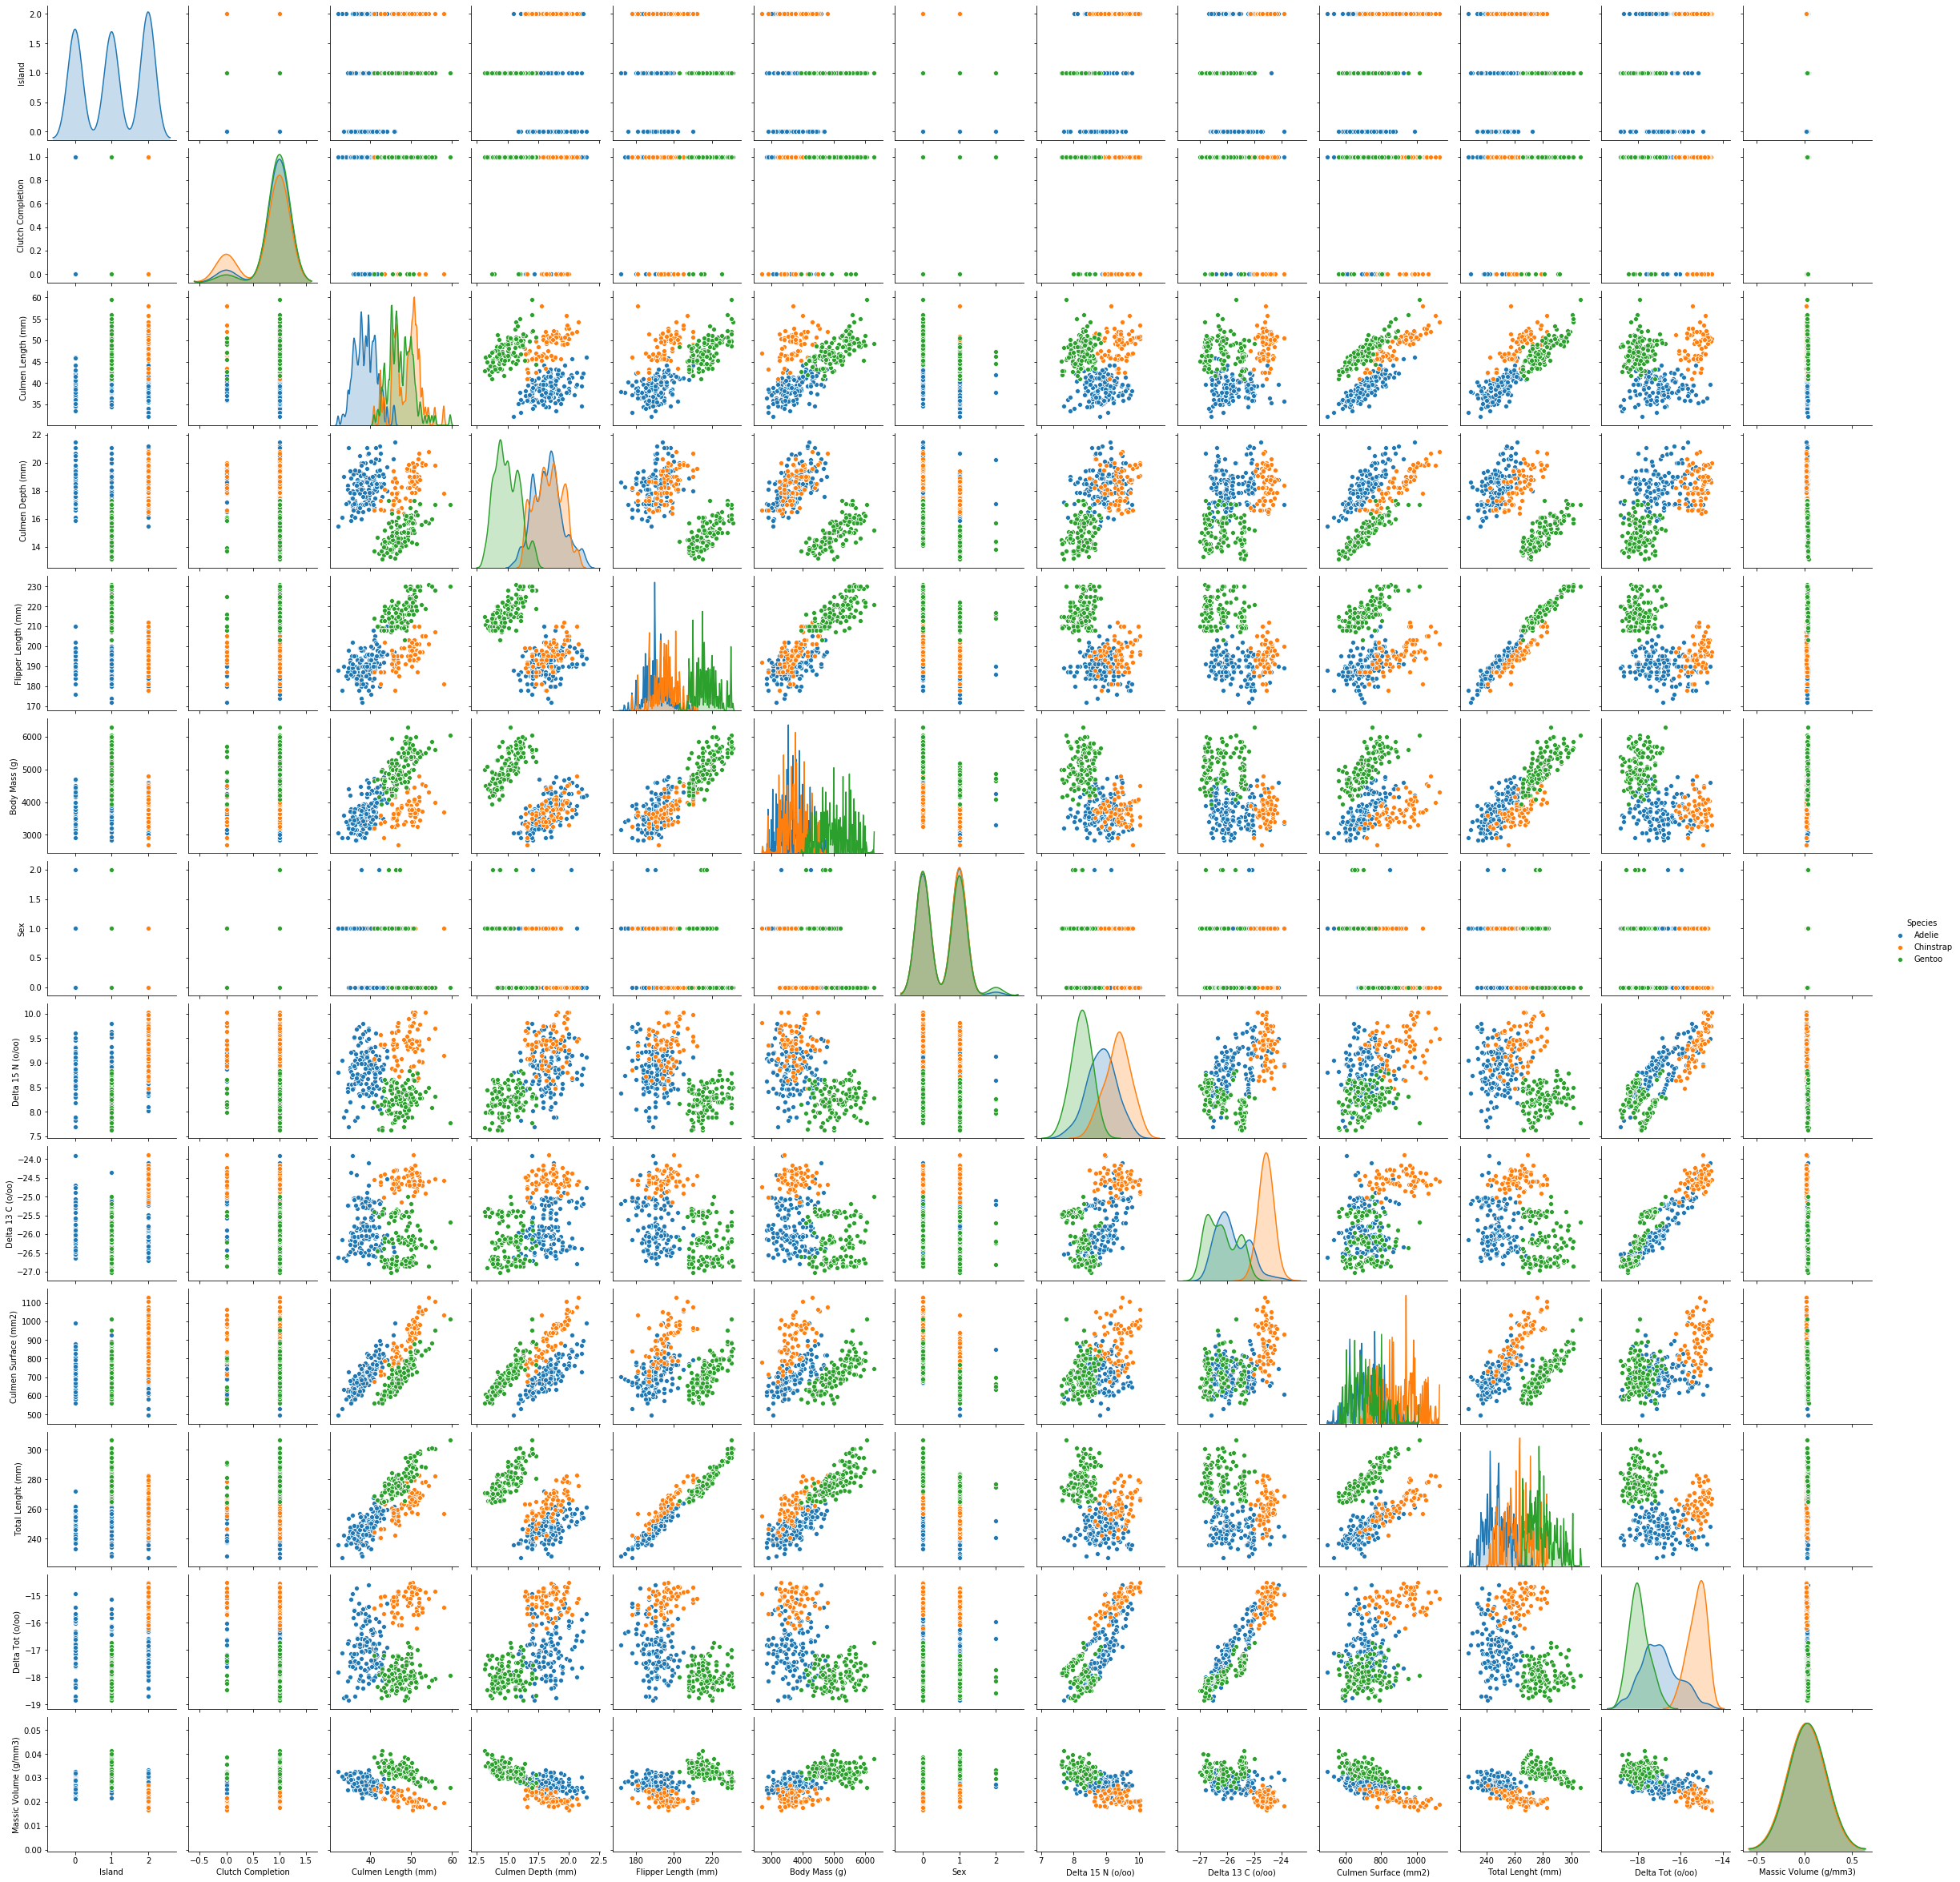

In [101]:
df_plot = df
df_plot['Species'] = df_plot['Species'].replace([0,1,2],['Adelie','Chinstrap','Gentoo'])
sns.pairplot(df_plot, hue='Species',diag_kws={'bw': 0.2})

On remarque que les 3 groupes d'espèces ne sont pas équitablement répartis

In [102]:
df_plot['Species'].value_counts()

Adelie       141
Gentoo       122
Chinstrap     67
Name: Species, dtype: int64

On réalise une map de chaleur afin de voir les corrélation de visuel

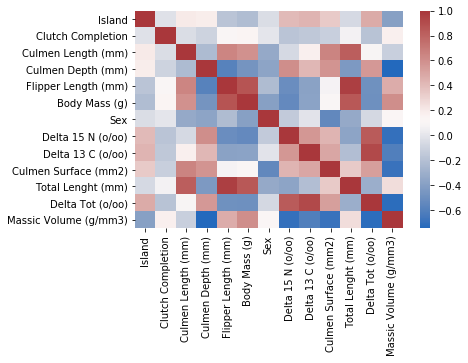

In [103]:
sns.heatmap(df.corr(), cmap="vlag")

# **MISE EN PLACE DU MACHINE LEARNING**

La Target étant **l'espèce** (y) et les Features étant toutes les **autres données** (X)

In [104]:
X = df.drop('Species', 1)
y = df['Species'].replace(['Adelie','Chinstrap','Gentoo'],[0,1,2])

Répartition de **Train set** et **Test set** - En général <span style="color: #26B260">0.2 < test_size < 0.4</span>

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Variables pour stocker les différentes méthodes utilisées (LR,KNN ...) et leur score de performance

In [106]:
method = []
scores = []

## <center>Linear Regression</center>

L'algorithme de régression linéaire est un algorithme d'apprentissage supervisé c'est-à-dire qu'à partir de la variable cible ou de la variable à expliquer (Y), le modèle a pour but de faire une prédiction grâce à des variables dites explicatives (X) ou prédictives.

In [107]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

method.append('Linear regresion')
scores.append(model.score(X_test,y_test))

print(method[-1],'test Score : {0:.5f}'.format(scores[-1]))

Linear regresion test Score : 0.92326


## <center>KNN</center>

L’algorithme des K plus proches voisins ou K-nearest neighbors (kNN) est un algorithme de Machine Learning qui appartient à la classe des algorithmes d’apprentissage supervisé simple et facile à mettre en œuvre qui peut être utilisé pour résoudre les problèmes de classification et de régression

In [108]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train,y_train)

method.append('KNN')
scores.append(model.score(X_test,y_test))

print(method[-1],'test Score : {0:.5f}'.format(scores[-1]))

KNN test Score : 0.86364


## <center>Decision Tree</center>

L'apprentissage par arbre de décision est une méthode classique en apprentissage automatique. Son but est de créer un modèle qui prédit la valeur d'une variable-cible depuis la valeur de plusieurs variables d'entrée.

In [109]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)
method.append('Decision Tree')
scores.append(model.score(X_test,y_test))

print(method[-1],'test Score : {0:.5f}'.format(scores[-1]))

Decision Tree test Score : 0.93939


## <center>Random Forest</center>

Le random forest ou forêt aléatoire est un algorithme sophistiqué, dans le domaine du machine learning. Il permet d'obtenir une prédiction fiable, grâce à son système de forêt d'arbres décisionnels.

In [110]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)
method.append('Random Forest')
scores.append(model.score(X_test,y_test))

print(method[-1],'test Score : {0:.5f}'.format(scores[-1]))

Random Forest test Score : 0.98485


## <center>SVC</center>

Le SVM est une solution à ce problème de classification1. Le SVM appartient à la catégorie des classificateurs linéaires (qui utilisent une séparation linéaire des données), et qui dispose de sa méthode à lui pour trouver la frontière entre les catégories.

In [111]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train,y_train)
method.append('SVC')
scores.append(model.score(X_test,y_test))

print(method[-1],'test Score : {0:.5f}'.format(scores[-1]))

SVC test Score : 0.75758


## <center>Neural Network</center>

Ces réseaux de neurones sont appelés des réseaux neuronaux convolutifs (Convolutional Neural Networks). Ces réseaux peuvent être imaginés comme une compilation d'un segment d'informations pour au final traiter l'ensemble de l'information (par exemple le traitement d'image, de vidéos, de textes).

In [112]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(X_train,y_train)
method.append('Neural Network')
scores.append(model.score(X_test,y_test))

print(method[-1],'test Score : {0:.5f}'.format(scores[-1]))

Neural Network test Score : 0.89394


# **RÉCAPITULATIF PERFORMANCE**

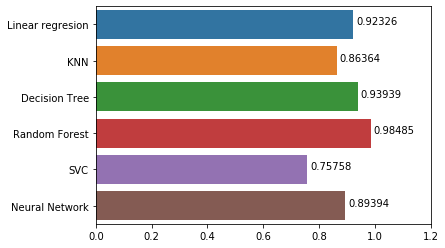

In [113]:
g = sns.barplot(x=scores,y=method)
g.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0,1.2])
show_values(g)


# **TUNING MACHINE LEARNING**

![conclusion.jpg](./images/banner_alt.jpg)

# **CONCLUSION**